<a href="https://colab.research.google.com/github/evTaiPham/Credit-Card-Approval-Prediction/blob/main/Credit_Card_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [3]:
application_record =pd.read_csv("/content/drive/MyDrive/archive/application_record.csv")
credit_record = pd.read_csv("/content/drive/MyDrive/archive/credit_record.csv")

In [4]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
len(pd.unique(credit_record["ID"]))

45985

In [ ]:
credit_record.replace(['X','C'], 0,inplace=True)

In [ ]:
credit_record.STATUS = pd.to_numeric(credit_record.STATUS)

In [ ]:
def approval(x):
  if x >= 2 :
    return 1
  else:
    return 0

credit_record["approval"] = credit_record['STATUS'].apply(approval)

In [ ]:
credit_record.drop(columns=["MONTHS_BALANCE","STATUS"], inplace=True)

In [ ]:
credit_record

,ID,approval
0,5001711,0
1,5001711,0
2,5001711,0
3,5001711,0
4,5001712,0
...,...,...
1048570,5150487,0
1048571,5150487,0
1048572,5150487,0
1048573,5150487,0


In [ ]:
new =pd.DataFrame(credit_record.groupby(["ID"])["approval"].max())

In [ ]:
new

,approval
ID,
5001711,0
5001712,0
5001713,0
5001714,0
5001715,0
...,...
5150482,0
5150483,0
5150484,0


In [ ]:
new["approval"].value_counts()

0    45318
1      667
Name: approval, dtype: int64

<AxesSubplot:>

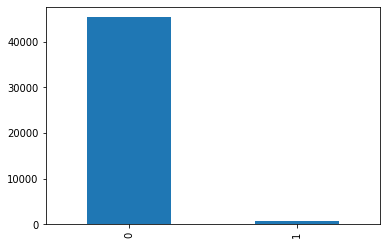

In [ ]:
new["approval"].value_counts().plot(kind="bar")

In [ ]:
new_data=pd.merge(application_record,new,how="inner",on="ID")

In [ ]:
new_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,approval
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,1


In [ ]:
new_data.isna().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
approval                   0
dtype: int64

In [ ]:
new_data["OCCUPATION_TYPE"].value_counts()

Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
new_data.OCCUPATION_TYPE.replace(np.nan, 'Other', inplace = True)

In [ ]:
new_data["OCCUPATION_TYPE"].value_counts()

Other                    11323
Laborers                  6211
Core staff                3591
Sales staff               3485
Managers                  3012
Drivers                   2138
High skill tech staff     1383
Accountants               1241
Medicine staff            1207
Cooking staff              655
Security staff             592
Cleaning staff             551
Private service staff      344
Low-skill Laborers         175
Waiters/barmen staff       174
Secretaries                151
HR staff                    85
Realty agents               79
IT staff                    60
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for col in new_data.columns:
    if new_data[col].dtype == 'object':
        new_data[col] = le.fit_transform(new_data[col])

In [ ]:
new_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,approval
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,12,2.0,0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,12,2.0,0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,17,2.0,0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,15,1.0,0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,15,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,315000.0,4,4,1,1,-17348,-2420,1,0,0,0,10,2.0,1
36453,5149834,0,0,1,0,157500.0,0,1,1,1,-12387,-1325,1,0,1,1,11,2.0,1
36454,5149838,0,0,1,0,157500.0,1,1,1,1,-12387,-1325,1,0,1,1,11,2.0,1
36455,5150049,0,0,1,0,283500.0,4,4,1,1,-17958,-655,1,0,0,0,15,2.0,1


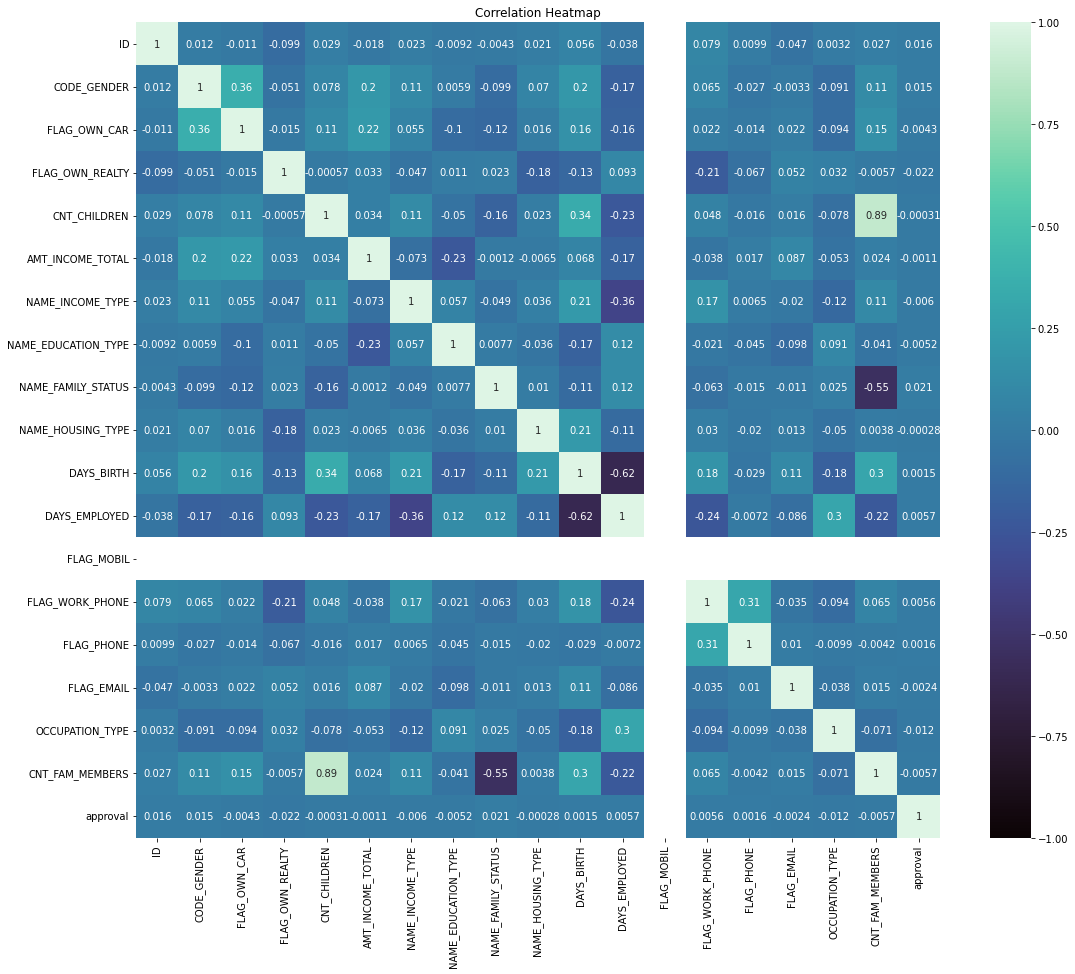

In [ ]:
corr = new_data.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
new_data.drop(columns=["ID","FLAG_MOBIL","NAME_FAMILY_STATUS","CNT_CHILDREN"], inplace=True)

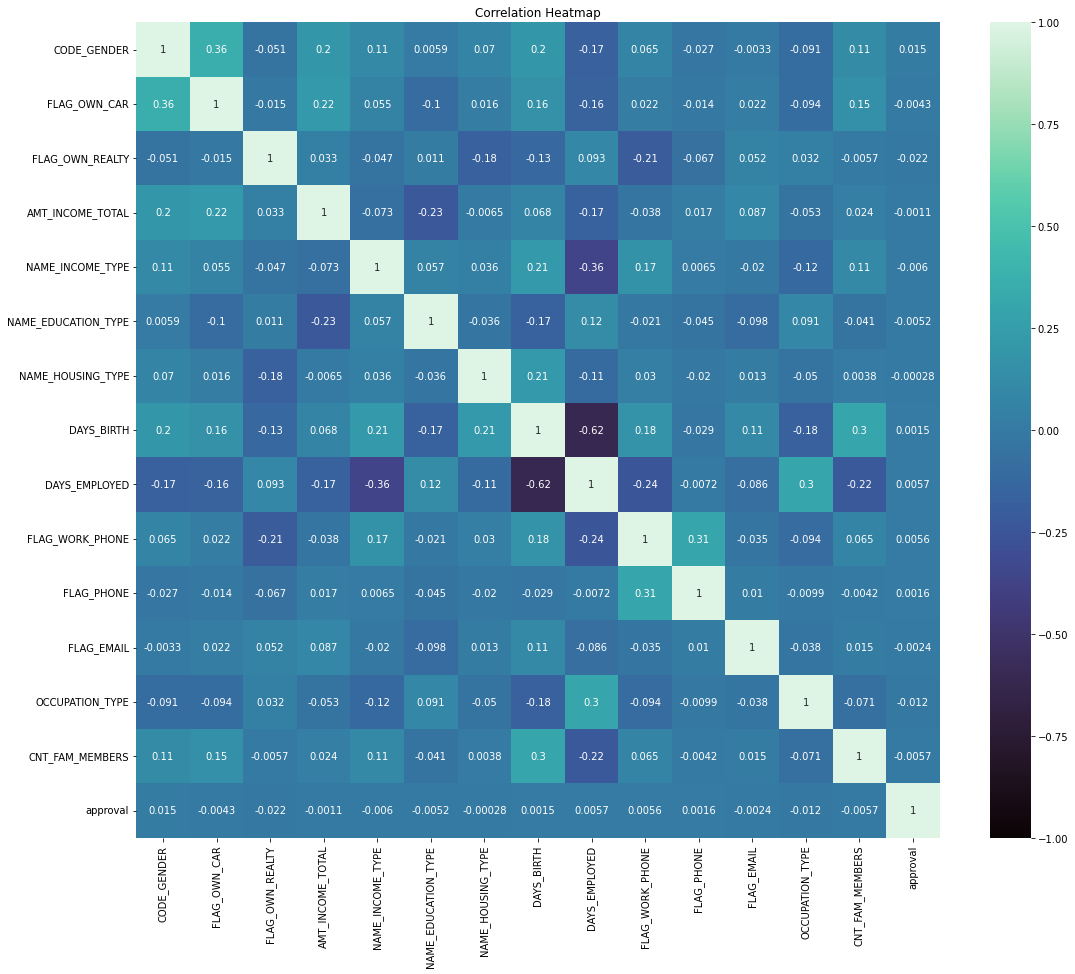

In [ ]:
corr = new_data.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
new_data

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,approval
0,1,1,1,427500.0,4,1,4,-12005,-4542,1,0,0,12,2.0,0
1,1,1,1,427500.0,4,1,4,-12005,-4542,1,0,0,12,2.0,0
2,1,1,1,112500.0,4,4,1,-21474,-1134,0,0,0,17,2.0,0
3,0,0,1,270000.0,0,4,1,-19110,-3051,0,1,1,15,1.0,0
4,0,0,1,270000.0,0,4,1,-19110,-3051,0,1,1,15,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1,315000.0,4,4,1,-17348,-2420,0,0,0,10,2.0,1
36453,0,0,1,157500.0,0,1,1,-12387,-1325,0,1,1,11,2.0,1
36454,0,0,1,157500.0,1,1,1,-12387,-1325,0,1,1,11,2.0,1
36455,0,0,1,283500.0,4,4,1,-17958,-655,0,0,0,15,2.0,1


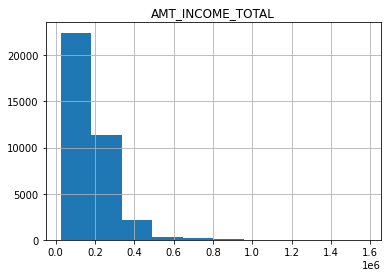

In [ ]:
dt_hist = new_data[['AMT_INCOME_TOTAL']]
hist = dt_hist.hist(bins=10) 
plt.show()

In [ ]:
predictors = new_data.drop(columns=["approval"]).columns.values

X = new_data[predictors]

Y = new_data["approval"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X[predictors])
X[predictors] = scaler.transform(X[predictors])

X

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,1.0,1.0,1.0,0.258721,1.00,0.25,0.8,0.744324,0.029324,1.0,0.0,0.0,0.666667,0.052632
1,1.0,1.0,1.0,0.258721,1.00,0.25,0.8,0.744324,0.029324,1.0,0.0,0.0,0.666667,0.052632
2,1.0,1.0,1.0,0.055233,1.00,1.00,0.2,0.208232,0.038270,0.0,0.0,0.0,0.944444,0.052632
3,0.0,0.0,1.0,0.156977,0.00,1.00,0.2,0.342071,0.033237,0.0,1.0,1.0,0.833333,0.000000
4,0.0,0.0,1.0,0.156977,0.00,1.00,0.2,0.342071,0.033237,0.0,1.0,1.0,0.833333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1.0,1.0,1.0,0.186047,1.00,1.00,0.2,0.441828,0.034894,0.0,0.0,0.0,0.555556,0.052632
36453,0.0,0.0,1.0,0.084302,0.00,0.25,0.2,0.722697,0.037768,0.0,1.0,1.0,0.611111,0.052632
36454,0.0,0.0,1.0,0.084302,0.25,0.25,0.2,0.722697,0.037768,0.0,1.0,1.0,0.611111,0.052632
36455,0.0,0.0,1.0,0.165698,1.00,1.00,0.2,0.407292,0.039527,0.0,0.0,0.0,0.833333,0.052632


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 123)

In [ ]:
X_train.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
13646,0.0,0.0,0.0,0.026163,1.0,1.00,0.2,0.289588,0.028308,0.0,1.0,0.0,0.444444,0.000000
35049,0.0,0.0,1.0,0.069767,0.5,0.50,0.2,0.553756,0.032500,0.0,0.0,0.0,0.166667,0.052632
5392,0.0,0.0,1.0,0.127907,0.0,0.25,0.2,0.533998,0.034503,0.0,1.0,0.0,0.555556,0.105263
10111,0.0,0.0,1.0,0.026163,0.5,1.00,0.2,0.396422,0.034035,0.0,0.0,0.0,0.611111,0.052632
1653,1.0,1.0,1.0,0.273256,0.0,1.00,0.2,0.395120,0.039467,0.0,1.0,1.0,0.166667,0.105263


In [ ]:
Y_train.value_counts()

0    25085
1      434
Name: approval, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=5)
X_train_resample, Y_train_resample = sm.fit_resample(X_train,Y_train)

In [ ]:
Y_train_resample.value_counts()

0    25085
1    25085
Name: approval, dtype: int64

In [ ]:
from sklearn.metrics import plot_confusion_matrix

              precision    recall  f1-score   support

           0       0.98      0.59      0.73     10756
           1       0.02      0.43      0.03       182

    accuracy                           0.58     10938
   macro avg       0.50      0.51      0.38     10938
weighted avg       0.97      0.58      0.72     10938



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


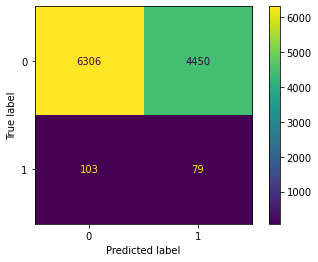

In [ ]:
model_log = LogisticRegression() 
model_log.fit(X_train_resample, Y_train_resample)
Y_pred = model_log.predict(X_test)

# In ra du lieu
print(classification_report( Y_test, Y_pred))

plot_confusion_matrix(model_log, X_test, Y_test)
plt.show()

0.51017


<ipython-input-39-47b84e23b309>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1],'r--', color="navy")


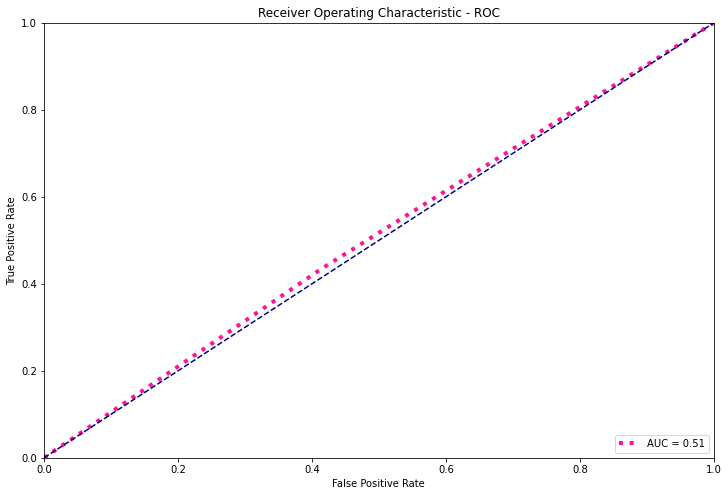

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict

fpr_log_ros, tpr_log_ros, thresholds_log_ros = roc_curve(Y_test, Y_pred)

auc_log_ros = float("{:.5f}".format(auc(fpr_log_ros, tpr_log_ros)))
print(auc_log_ros)

plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic - ROC')
plt.plot(fpr_log_ros, tpr_log_ros, ':', linewidth=4, label = 'AUC = %0.2f' % auc_log_ros, color="deeppink", )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color="navy")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
     

              precision    recall  f1-score   support

           0       0.99      0.83      0.90     10756
           1       0.04      0.40      0.07       182

    accuracy                           0.82     10938
   macro avg       0.51      0.61      0.48     10938
weighted avg       0.97      0.82      0.89     10938

Accuracy Score is 0.81907
      0     1
0  8887  1869
1   110    72


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


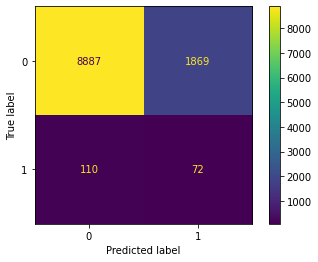

In [ ]:
model = DecisionTreeClassifier(max_depth=12,
                               min_samples_split=8,
                               random_state=1024)
model.fit(X_train_resample, Y_train_resample)
y_predict = model.predict(X_test)
print(classification_report( Y_test, y_predict))
plot_confusion_matrix(model, X_test, Y_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(Y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(Y_test,y_predict)))


            

0.61092


<ipython-input-41-76d238ebd62c>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1],'r--', color="navy")


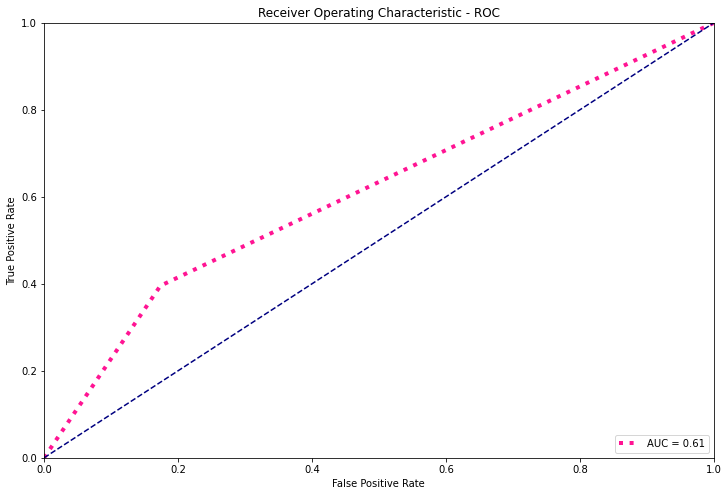

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict

fpr_log_ros, tpr_log_ros, thresholds_log_ros = roc_curve(Y_test, y_predict)

auc_log_ros = float("{:.5f}".format(auc(fpr_log_ros, tpr_log_ros)))
print(auc_log_ros)

plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic - ROC')
plt.plot(fpr_log_ros, tpr_log_ros, ':', linewidth=4, label = 'AUC = %0.2f' % auc_log_ros, color="deeppink", )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color="navy")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
     

In [ ]:
model = svm.SVC(C = 0.8,
                kernel='linear')
model.fit(X_train_resample, Y_train_resample)
y_predict_1 = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(Y_test, y_predict_1)))
print(pd.DataFrame(confusion_matrix(Y_test,y_predict_1)))

Accuracy Score is 0.596
      0     1
0  6431  4325
1    94    88


0.54071


<ipython-input-43-ad0a1ab5001a>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1],'r--', color="navy")


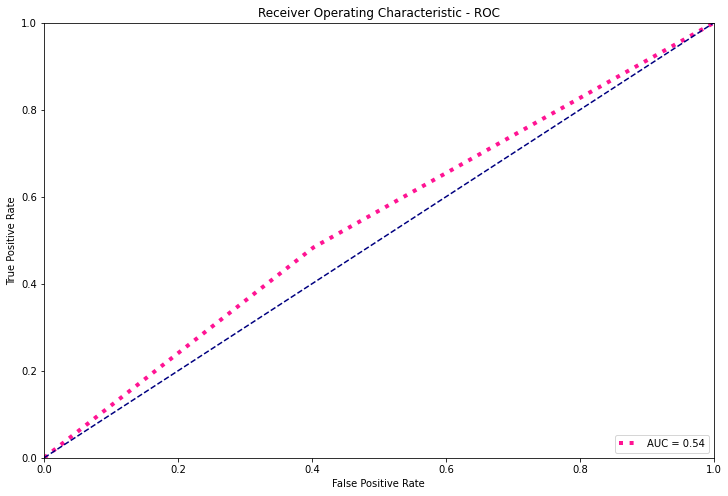

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict

fpr_log_ros, tpr_log_ros, thresholds_log_ros = roc_curve(Y_test, y_predict_1)

auc_log_ros = float("{:.5f}".format(auc(fpr_log_ros, tpr_log_ros)))
print(auc_log_ros)

plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic - ROC')
plt.plot(fpr_log_ros, tpr_log_ros, ':', linewidth=4, label = 'AUC = %0.2f' % auc_log_ros, color="deeppink", )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color="navy")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
     

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
model.fit(X_train_resample, Y_train_resample)
y_predict_2 = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(Y_test, y_predict_2)))
print(pd.DataFrame(confusion_matrix(Y_test,y_predict_2)))

Accuracy Score is 0.92558
       0    1
0  10080  676
1    138   44


0.58945


<ipython-input-46-ab3950737d9d>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1],'r--', color="navy")


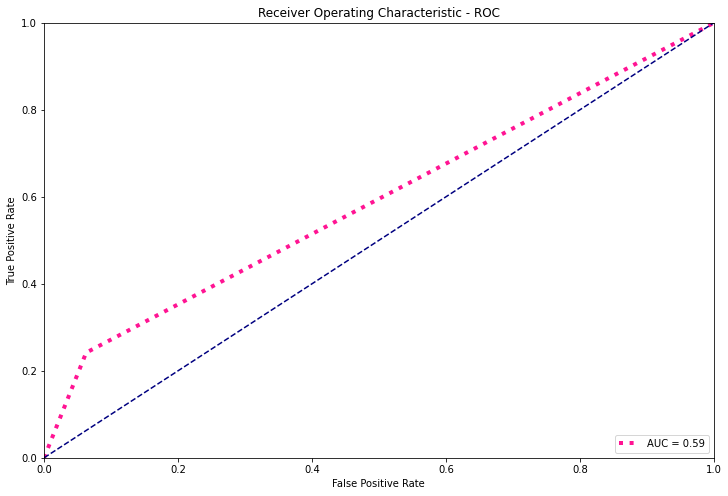

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict

fpr_log_ros, tpr_log_ros, thresholds_log_ros = roc_curve(Y_test, y_predict_2)

auc_log_ros = float("{:.5f}".format(auc(fpr_log_ros, tpr_log_ros)))
print(auc_log_ros)

plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic - ROC')
plt.plot(fpr_log_ros, tpr_log_ros, ':', linewidth=4, label = 'AUC = %0.2f' % auc_log_ros, color="deeppink", )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color="navy")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()